http://jeroenjanssens.com/2013/09/19/seven-command-line-tools-for-data-science.html

In [1168]:
import numpy as np
from os import path

data_dir = "/home/daniel/git/Python2.7/DataScience/nlp_training_data"

chap_line_nums = np.loadtxt(path.join(data_dir, 'alice_chap_nums.txt'), dtype='int', delimiter='\n')

f = open(path.join(data_dir,'alice.txt'), 'r')
lines = f.readlines()
f.close()
     
print chap_line_nums

[ 212  422  632  891 1160 1461 1792 2137 2454 2778 3077 3343 3637]


In [1169]:
for i in range(chap_line_nums.size - 1):
    chap_num = i + 1
    f = open(path.join(data_dir,'chap_%02i.txt' %chap_num), 'w')
    
    start = chap_line_nums[i]
    end = chap_line_nums[i+1] - 1

    for line in lines[start:end]:
        f.write(line) 
    
    f.close()
    

In [1170]:
import glob

chps = glob.glob(path.join(data_dir,"chap_*.txt"))
chps.sort()

for ch in chps:
    print ch
    

/home/daniel/git/Python2.7/DataScience/nlp_training_data/chap_01.txt
/home/daniel/git/Python2.7/DataScience/nlp_training_data/chap_02.txt
/home/daniel/git/Python2.7/DataScience/nlp_training_data/chap_03.txt
/home/daniel/git/Python2.7/DataScience/nlp_training_data/chap_04.txt
/home/daniel/git/Python2.7/DataScience/nlp_training_data/chap_05.txt
/home/daniel/git/Python2.7/DataScience/nlp_training_data/chap_06.txt
/home/daniel/git/Python2.7/DataScience/nlp_training_data/chap_07.txt
/home/daniel/git/Python2.7/DataScience/nlp_training_data/chap_08.txt
/home/daniel/git/Python2.7/DataScience/nlp_training_data/chap_09.txt
/home/daniel/git/Python2.7/DataScience/nlp_training_data/chap_10.txt
/home/daniel/git/Python2.7/DataScience/nlp_training_data/chap_11.txt
/home/daniel/git/Python2.7/DataScience/nlp_training_data/chap_12.txt


In [1171]:
from nltk import tokenize
import nltk
import re

In [1172]:
def get_chap_sents(filename):
    f = open(filename, 'r')
    lines = f.read()
    f.close()

    sents = tokenize.sent_tokenize(lines)
    sents = map(lambda s:s.replace('\r\n',' '), sents)
    sents = map(lambda s:s.replace('_',''), sents)
    sents = map(lambda s:s.replace(',',' '), sents)
    
    return sents

def join_n_sentences(sentences, n=6):
    new_lines = []
    num_sent = len(sentences)
    index = np.arange(0, num_sent, n)
    
    for i in index:
        concat_lines = ' '.join(sentences[i:i+n+1])
        new_lines.append(concat_lines)
        
    return new_lines    

def build_docs(filename):
    sents = get_chap_sents(filename)
    doc = join_n_sentences(sents)
    
    return doc

def get_nltk_pos(string):
    test = string.decode('ascii', 'ignore')
    test = tokenize.word_tokenize(test)
    pos = nltk.pos_tag(test)
    
    return pos

#pat = "^[NVJR]"
pat = "^[NV]"
reg = re.compile(pat)
def filter_pos(pos):
    out = []
    for item in pos:
        if reg.match(item[1]):
            out.append(item[0])
            
    return out        

def get_pos(doc):
    out = []
    for string in doc:
        pos = get_nltk_pos(string)
        #print pos
        temp = filter_pos(pos)
        string = ' '.join(temp)
        out.append(string)
    
    #out = [item for sub_list in out for item in sub_list]
    return out

def remove_short_words(pos, num_letters=2):
    out = []
    for word in pos.split(' '):
        if len(word) < num_letters:
            continue
        else:
            out.append(word)
         
    return ' '.join(out)    
      
        

In [1173]:
docs = build_docs(chps[0])
print docs[3] 
print '\n' + str(len(docs)) + " sentences" + '\n'
docs = map(remove_short_words, docs)
print docs[3]

Would the fall never come to an end? "I wonder how many miles I've fallen by this time?" she said aloud. "I must be getting somewhere near the centre of the earth. Let me see: that would be four thousand miles down. I think--" (for  you see  Alice had learnt several things of this sort in her lessons in the schoolroom  and though this was not a very good opportunity for showing off her knowledge  as there was no one to listen to her  still it was good practice to say it over) "--yes  that's about the right distance--but then I wonder what Latitude or Longitude I've got to?" (Alice had no idea what Latitude was  or Longitude either  but thought they were nice grand words to say.)

15 sentences

Would the fall never come to an end? "I wonder how many miles I've fallen by this time?" she said aloud. "I must be getting somewhere near the centre of the earth. Let me see: that would be four thousand miles down. think--" (for you see Alice had learnt several things of this sort in her lessons

## Part of speech tagging

In [1174]:
pos = get_pos(docs)
print pos[0]

[ Sidenote Down ] ALICE was beginning get tired sitting sister bank having nothing do twice had peeped book was reading had pictures conversations is use book thought Alice pictures conversations So was considering mind day made feel ) pleasure making be trouble getting picking daisies White Rabbit pink eyes ran was nothing did Alice think way hear Rabbit say Oh dear be thought afterwards occurred have wondered time seemed ) Rabbit took watch looked hurried Alice started feet flashed mind had seen rabbit watch take burning curiosity ran field was time see pop hedge In moment went Alice considering world was get


In [1175]:
import pandas as pd
df = pd.DataFrame()

#df['doc'] = pos
df['doc'] = docs
df['chap'] = np.ones(len(pos))
df

,doc,chap
0,[Sidenote: Down the Rabbit-Hole] ALICE was beg...,1
1,In another moment down went Alice after it nev...,1
2,"thought Alice to herself. ""After such fall as ...",1
3,"Would the fall never come to an end? ""I wonder...",1
4,(Alice had no idea what Latitude was or Longit...,1
5,(and she tried to curtsey as she spoke--fancy ...,1
6,"""Dinah'll miss me very much to-night should th...",1
7,And here Alice began to get rather sleepy and ...,1
8,thump! down she came upon heap of sticks and d...,1
9,Suddenly she came upon little three-legged tab...,1


## Reduce the number of chapters: The full 12 didn't seem to work so well

In [1176]:
chps = chps[1::2]
print len(chps)

6


In [1177]:
for ind, _file in enumerate(chps[1:], start=2):
    docs = build_docs(_file)
    docs = map(remove_short_words, docs)
    #docs = get_pos(docs)
    n = len(docs)
    temp = pd.DataFrame({ 'doc':docs, 'chap':np.ones(n)*ind })
    #print temp
    df = pd.concat([df, temp], axis=0)

df.head()

,chap,doc
0,1,[Sidenote: Down the Rabbit-Hole] ALICE was beg...
1,1,In another moment down went Alice after it nev...
2,1,"thought Alice to herself. ""After such fall as ..."
3,1,"Would the fall never come to an end? ""I wonder..."
4,1,(Alice had no idea what Latitude was or Longit...


In [1178]:
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS, CountVectorizer

In [1179]:
grp = df.groupby('chap')
cnts = grp.chap.count()
_sum = grp.chap.count().sum()
mu = grp.chap.count().mean()

print cnts, "\n total", _sum, "\n mean", mu

chap
1       15
2       25
3       25
4       24
5       26
6       20
Name: chap, dtype: int64 
 total 135 
 mean 22.5


In [1180]:
stop_words = ENGLISH_STOP_WORDS.union(['alice', 'chapter', 'illustration'])

In [1205]:
vectorizer = TfidfVectorizer(max_features=200,
                             lowercase=True,
                             max_df=0.50,
                             min_df=5,
                             use_idf=True,
                             stop_words=stop_words,
                             norm='l2',
                             ngram_range=(1, 3),
                             analyzer='word',
                             decode_error='ignore',
                             strip_accents='unicode'
                            )

In [1206]:
# vectorizer = CountVectorizer(max_features=200,
#                              lowercase=True,
#                              max_df=50,
#                              min_df=10,
#                              stop_words=stop_words,
#                              ngram_range=(1, 13),
#                              analyzer='word',
#                              decode_error='ignore',
#                              strip_accents='unicode'
#                              )

In [1207]:
matrix = vectorizer.fit_transform(df['doc'])
features = vectorizer.get_feature_names()
features.sort()       

print matrix.shape 
print features
# vectorize the "docs"
# kmeans and store cluster in df

(135, 200)
[u'added', u'air', u'altogether', u'anxiously', u'appeared', u'arm', u'asked', u'away', u'baby', u'began', u'begin', u'beginning', u'better', u'bit', u'book', u'bottle', u'called', u'came', u'cat', u'certainly', u'change', u'child', u'close', u'come', u'coming', u'cook', u'couldn', u'course', u'cried', u'croquet', u'curious', u'dance', u'day', u'dead', u'dear', u'did', u'did like', u'didn', u'dinah', u'doesn', u'don', u'door', u'duchess', u'eat', u'end', u'eyes', u'face', u'fall', u'far', u'feet', u'felt', u'fish', u'footman', u'game', u'garden', u'gardeners', u'gave', u'getting', u'glass', u'gloves', u'going', u'gone', u'good', u'got', u'great', u'ground', u'grow', u'growing', u'grown', u'gryphon', u'half', u'hand', u'hands', u'happen', u'having', u'head', u'heads', u'hear', u'heard', u'high', u'hold', u'house', u'hurried', u'idea', u'jury', u'just', u'key', u'king', u'king said', u'knave', u'knew', u'know', u'large', u'let', u'life', u'like', u'like said', u'little', u'lit

In [1208]:
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances, euclidean_distances
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics

In [1209]:
cos_sim = cosine_similarity(matrix)
cos_dist.shape

(135, 135)

<matplotlib.colorbar.Colorbar instance at 0x7f68454fb3f8>

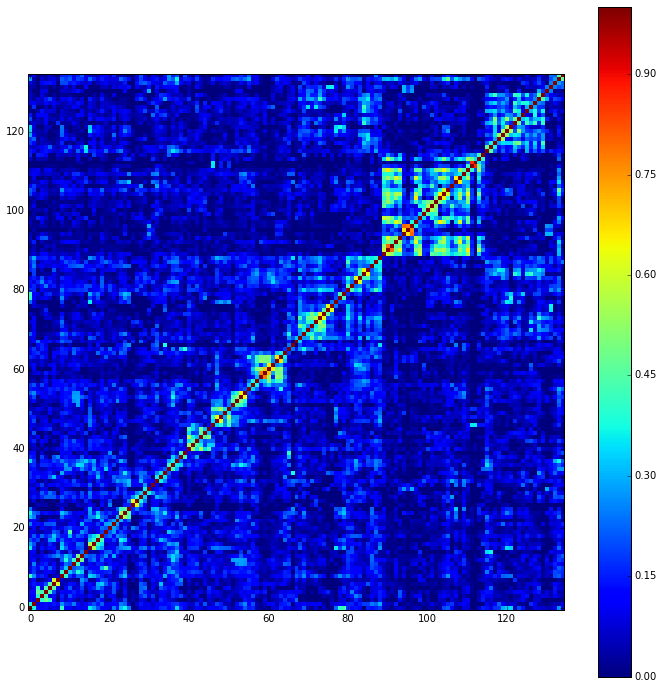

In [1210]:
plt.figure(figsize=(12, 12))
plt.imshow(cos_sim, origin='lower', interpolation='nearest')
plt.colorbar()

In [1211]:
cos_dist = cosine_distances(matrix)
euc_dist = euclidean_distances(matrix)

k = len(chps)
km = KMeans(k,
            #init='random',
            init='k-means++', 
            n_init=10, 
            max_iter=20000, 
            tol=1e-7, 
            precompute_distances='auto', 
            verbose=0, 
            random_state=None, 
            copy_x=True,
            n_jobs=4
            )

assignments = km.fit_predict(euc_dist)
print np.unique(assignments)

[0 1 2 3 4 5]


In [1212]:
df['cluster_chaps'] = assignments + 1

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html#sklearn.metrics.homogeneity_score

Homogeneity metric of a cluster labeling given a ground truth
A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

In [1213]:
metrics.homogeneity_score(df.chap, df.cluster_chaps)

0.51306702706919627

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html#sklearn.metrics.completeness_score

Completeness metric of a cluster labeling given a ground truth
A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.
This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

In [1214]:
metrics.completeness_score(df.chap, df.cluster_chaps)

0.56790274174073851

chap
1       [[Axes(0.125,0.125;0.775x0.775)]]
2       [[Axes(0.125,0.125;0.775x0.775)]]
3       [[Axes(0.125,0.125;0.775x0.775)]]
4       [[Axes(0.125,0.125;0.775x0.775)]]
5       [[Axes(0.125,0.125;0.775x0.775)]]
6       [[Axes(0.125,0.125;0.775x0.775)]]
dtype: object

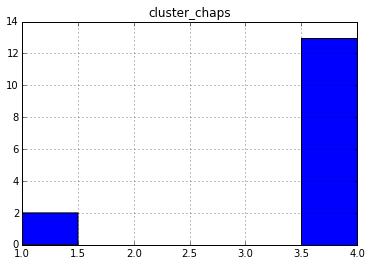

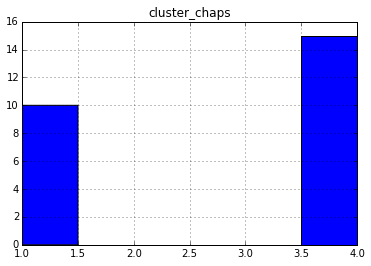

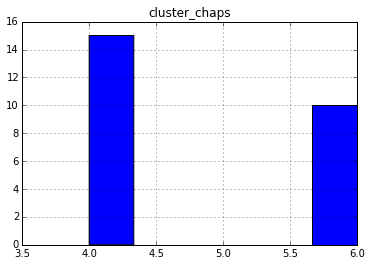

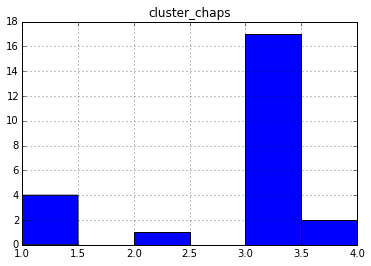

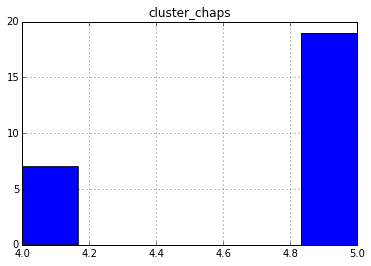

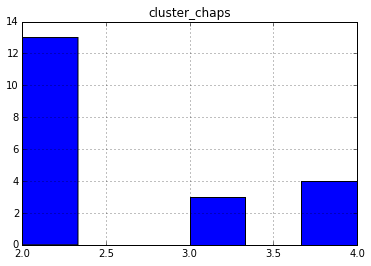

In [1215]:
grp = df.groupby('chap')
grp.hist(bins=k)

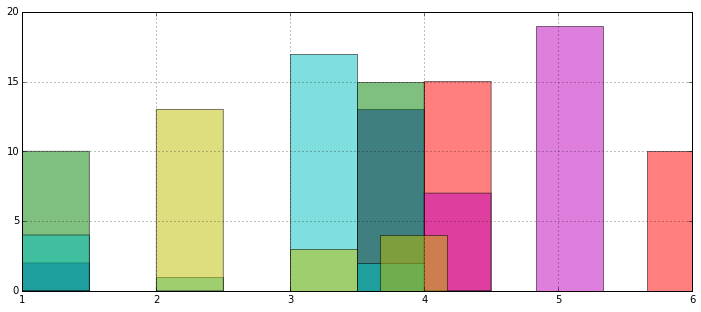

In [1216]:
%matplotlib inline
for i in range(1, 7):
    df[df.chap == i]['cluster_chaps'].hist(figsize=(12,5), alpha=0.5, width=0.5, bins=k)